In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('menu.csv')

data.head()



,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [6]:
# Cek apakah ada missing values

missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

How many calories does the average McDonald's value meal contain

In [ ]:
# Memisahkan data menjadi beberapa kategori

breakfast = data.loc[data.Category == "Breakfast"]
beef_pork = data.loc[data.Category == "Beef & Pork"]
chicken_fish = data.loc[data.Category == "Chicken & Fish"]
salad = data.loc[data.Category == "Salads"]
snack_sides = data.loc[data.Category == "Snacks & Sides"]
dessert = data.loc[data.Category == "Desserts"]

# Membuat rata-rata setiap Meal

avg = [round(breakfast['Calories'].mean(axis=0), 2), round(beef_pork['Calories'].mean(axis=0), 2), round(chicken_fish['Calories'].mean(axis=0), 2),
       round(salad['Calories'].mean(axis=0), 2), round(snack_sides['Calories'].mean(axis=0), 2),  round(dessert['Calories'].mean(axis=0), 2)]

index = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides Category', 'Dessert']
avg_calories = pd.DataFrame({'Average Calories': avg}, index=index).sort_values(by='Average Calories', ascending=False)

print(avg_calories)

                         Average Calories
Chicken & Fish                     552.96
Breakfast                          526.67
Beef & Pork                        494.00
Salads                             270.00
Snacks & Sides Category            245.77
Dessert                            222.14


In [ ]:
plt.figure(figsize=(15, 9))

ax = sns.barplot(x=avg_calories['Average Calories'], y=avg_calories.index, hue=avg_calories, data=avg_calories, palette='Flare')

for i in ax.containers:
    ax.bar_label(i, fmt="%.2f", label_type='edge')

plt.title("Average Calories of McDonald's Meals")
plt.xlabel("Average Calories")
plt.ylabel("Meal Category")
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (6, 1) instead

<Figure size 1500x900 with 0 Axes>

NameError: name 'i' is not defined

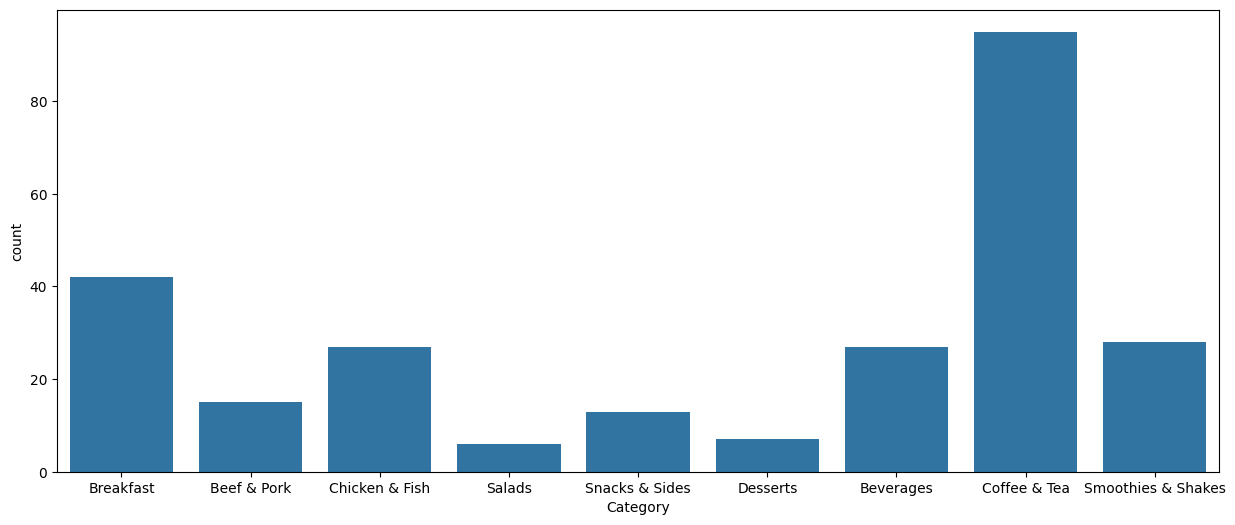

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x=data['Category'])
plt.title(f'Box Plot of {i}')
plt.show()

# plt.figure(figsize=(15, 6))
# sns.countplot(x=data['Item'])
# plt.title(f'Box Plot of {i}')
# plt.show()

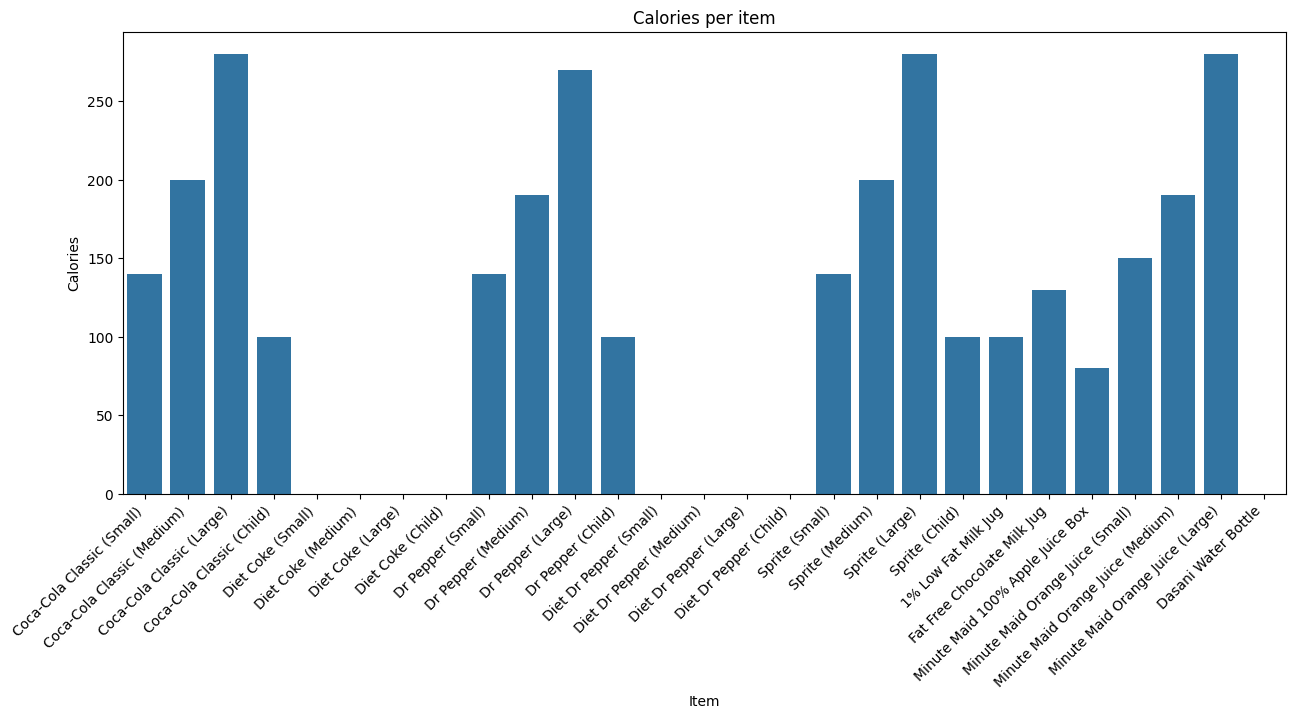

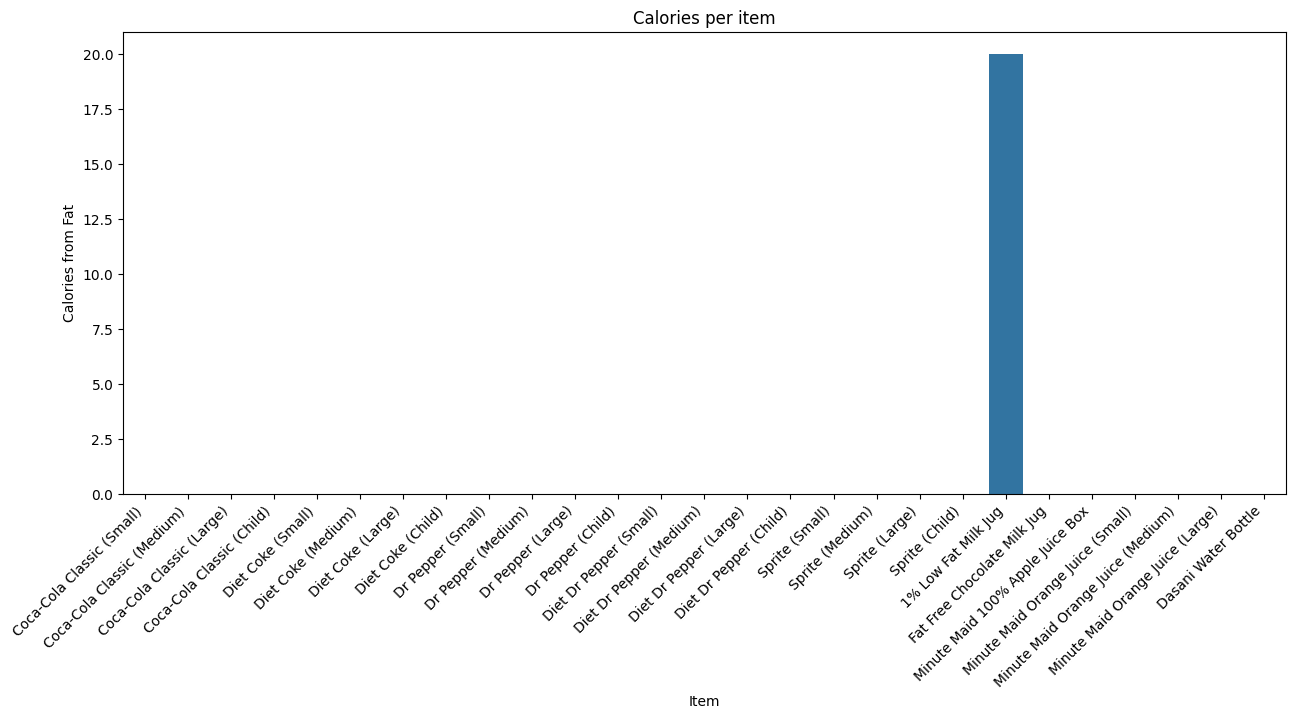

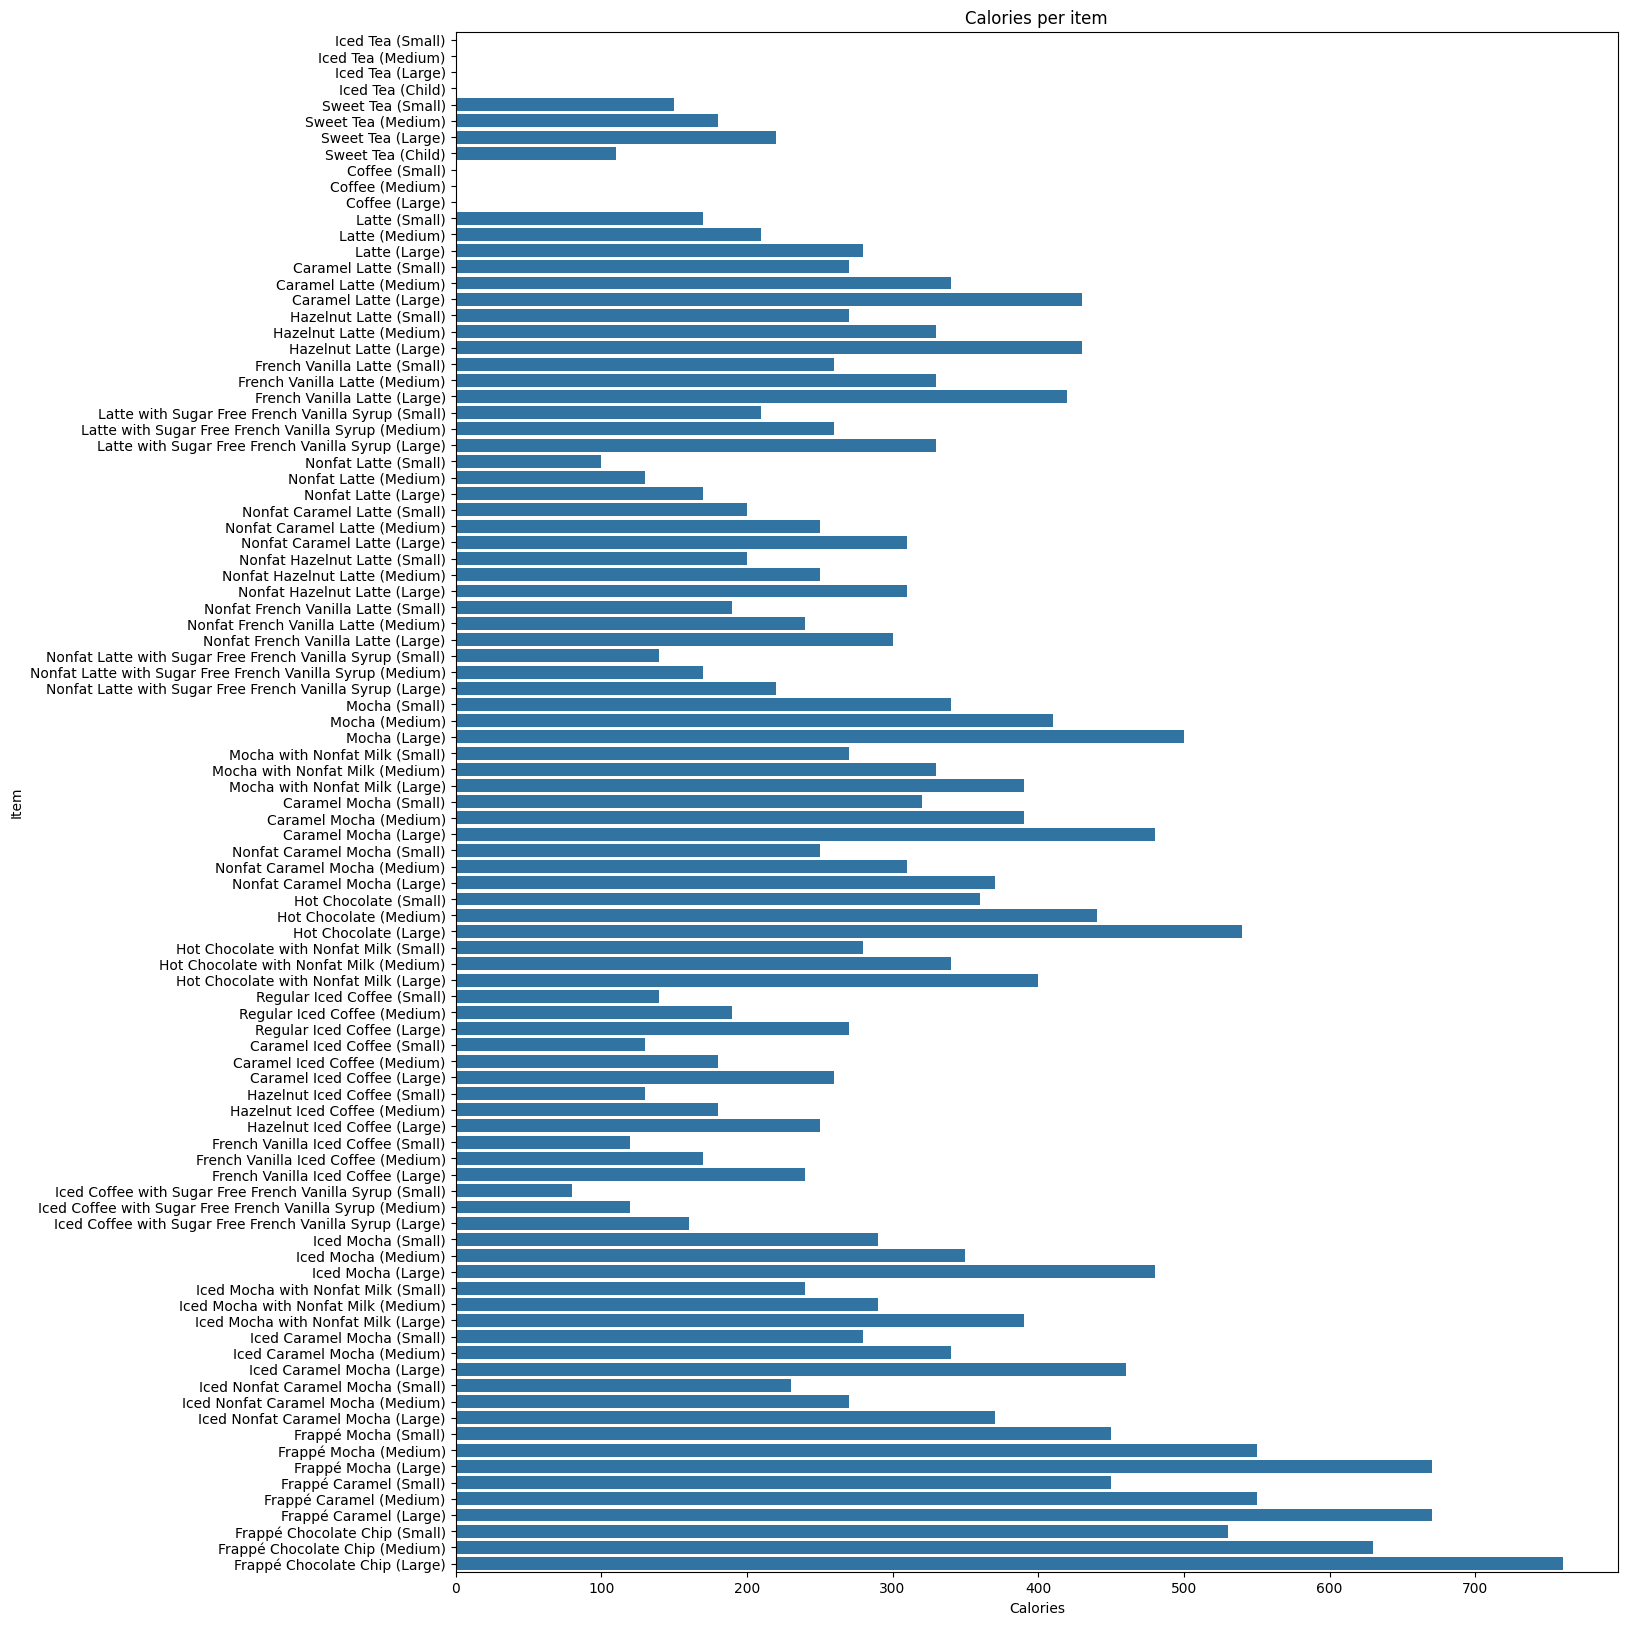

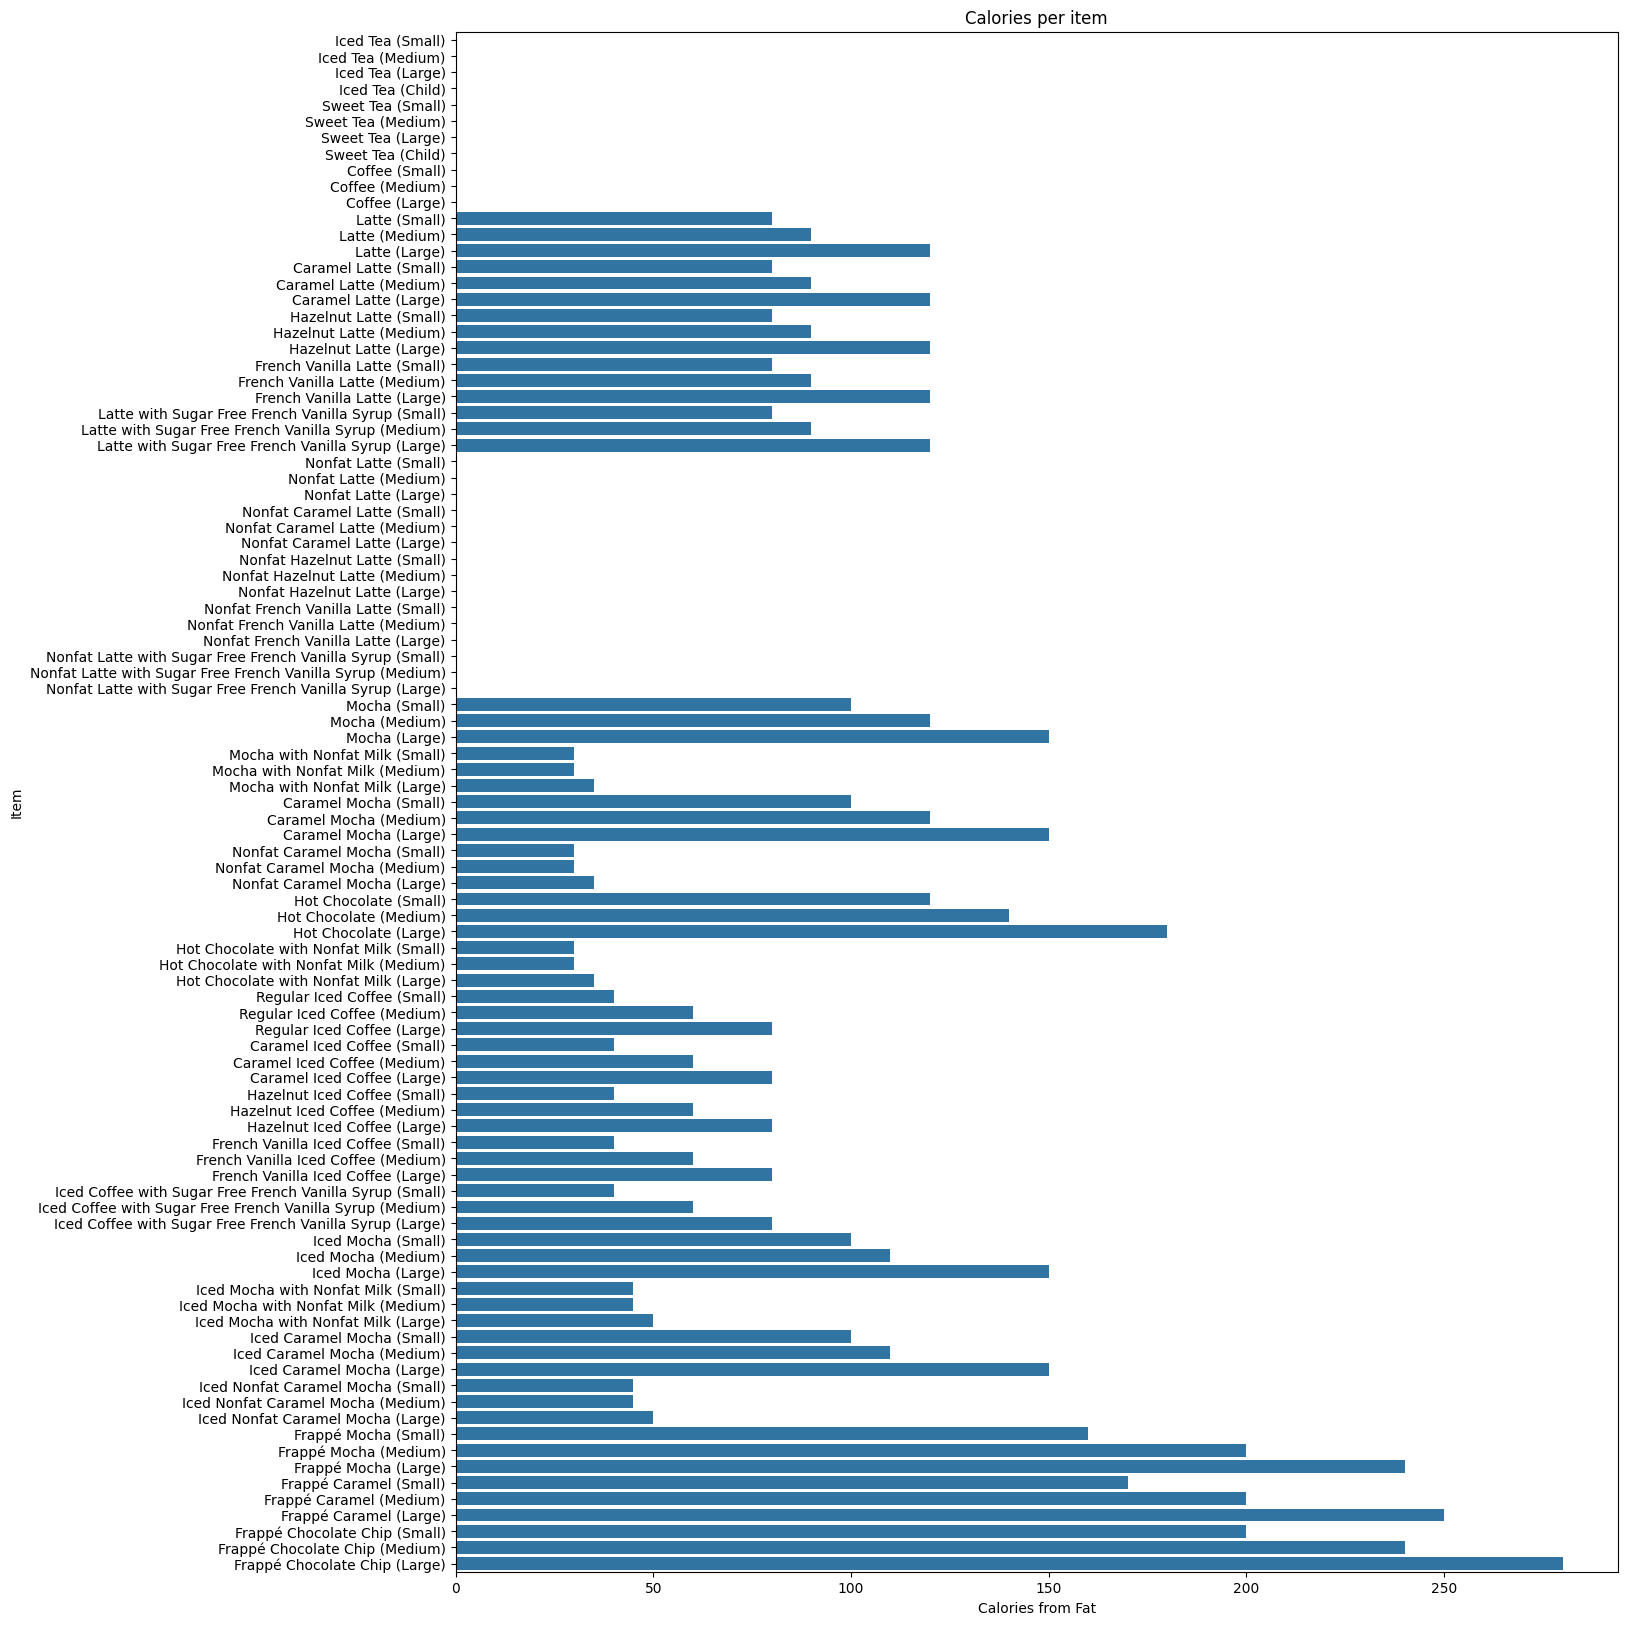

In [ ]:
category_beverages = (data['Category'] == "Beverages")
category_coffe_tea = (data['Category'] == "Coffee & Tea")
data_beverages = data.loc[category_beverages, data.columns]
data_coffe_tea = data.loc[category_coffe_tea, data.columns]

plt.figure(figsize=(15, 6))
sns.barplot(x=data_beverages['Item'], y=data_beverages['Calories'])
plt.xticks(rotation=45, ha='right')
plt.title("Calories per item")
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=data_beverages['Item'], y=data_beverages['Calories from Fat'])
plt.xticks(rotation=45, ha='right')
plt.title("Calories per item")
plt.show()

plt.figure(figsize=(15, 20))
sns.barplot(x=data_coffe_tea['Calories'], y=data_coffe_tea['Item'])
# plt.xticks(rotation=90, ha='right')
plt.title("Calories per item")
plt.show()

plt.figure(figsize=(15, 20))
sns.barplot(x=data_coffe_tea['Calories from Fat'], y=data_coffe_tea['Item'])
# plt.xticks(rotation=90, ha='right')
plt.title("Calories per item")
plt.show()